## Saliency Map Visualization

Displaying break/ndUDTMBzJmU_020
Feature 0


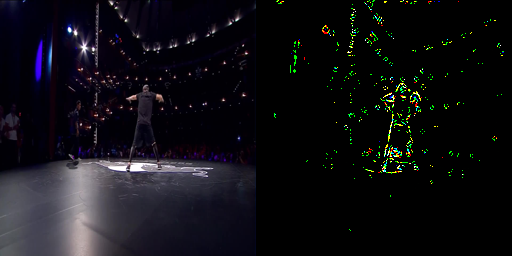

Feature 1


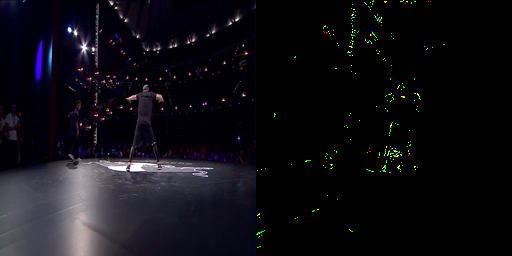

Feature 0


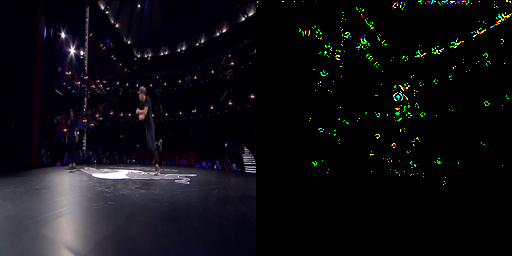

Feature 1


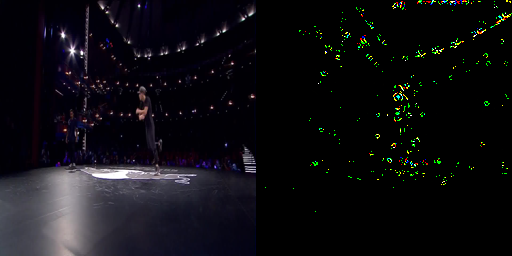

Feature 0


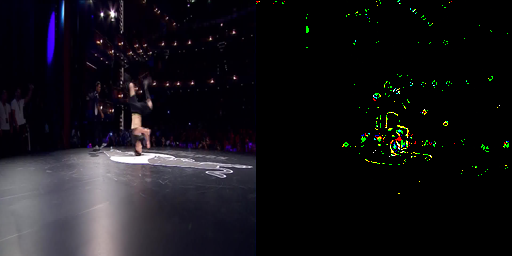

Feature 1


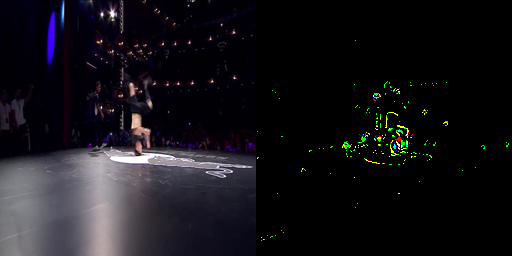

Feature 0


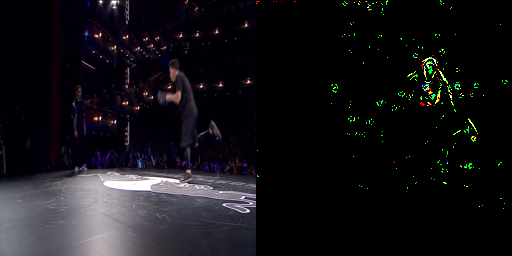

Feature 1


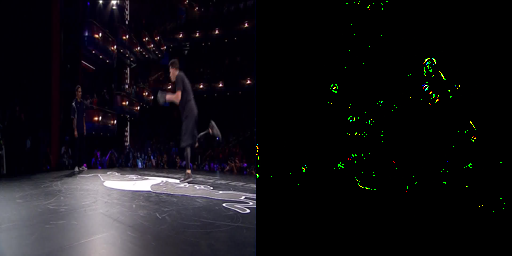

Displaying swing/AehnnJzWO80_103
Feature 0


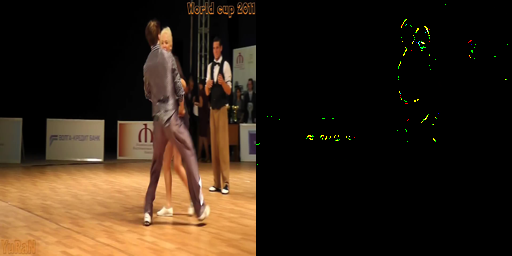

Feature 1


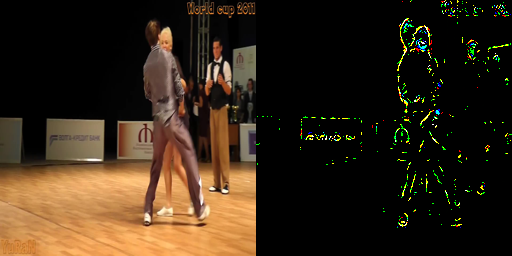

Feature 0


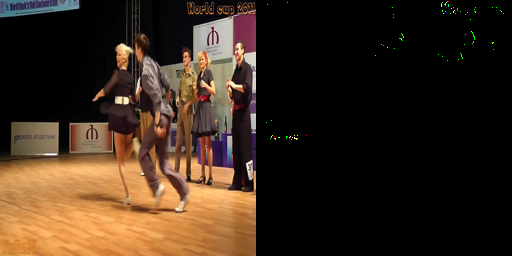

Feature 1


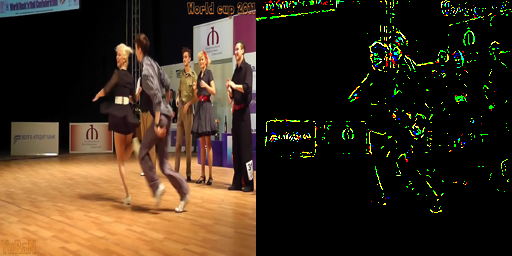

Feature 0


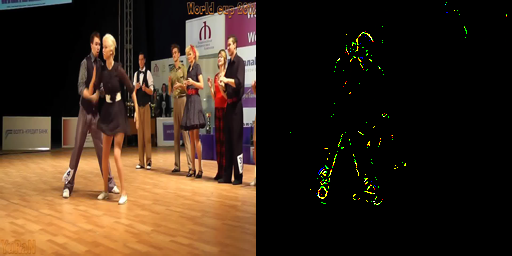

Feature 1


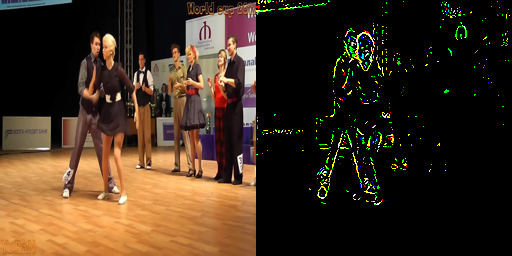

Displaying ballet/mSvNjhEPh7I_050
Feature 0


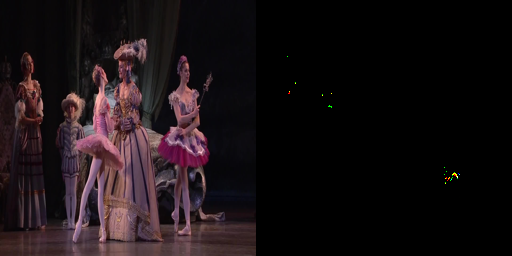

Feature 1


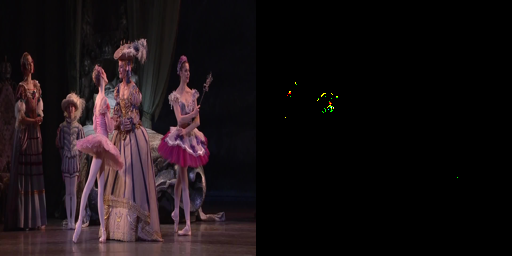

Feature 0


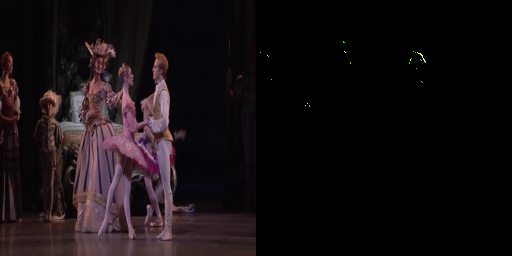

Feature 1


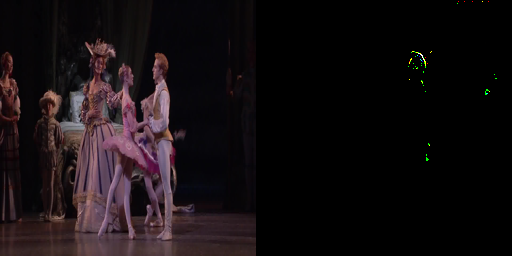

Feature 0


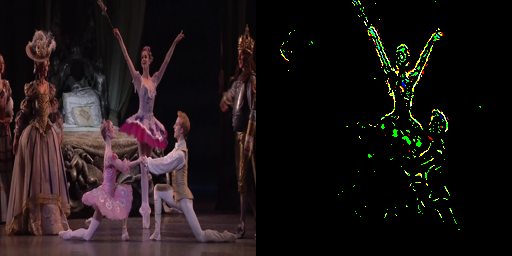

Feature 1


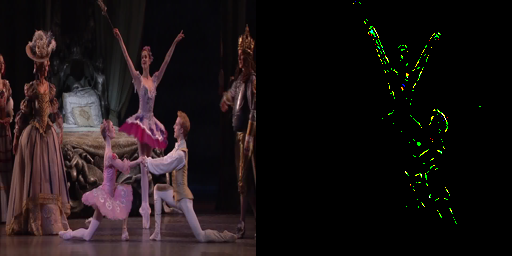

Displaying flamenco/7L4zXJ1OS6c_456
Feature 0


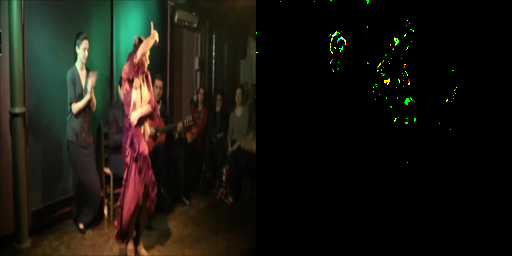

Feature 1


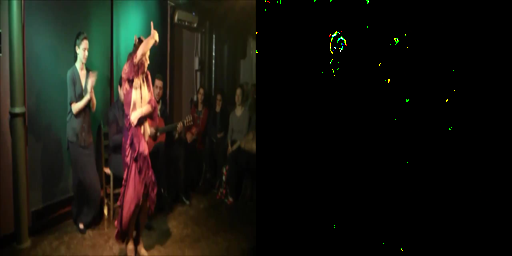

Feature 0


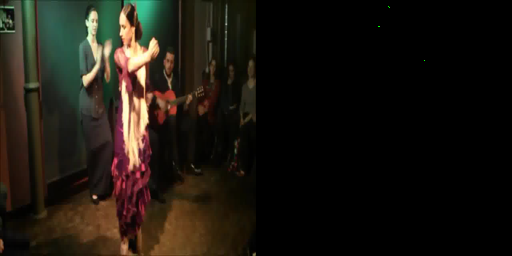

Feature 1


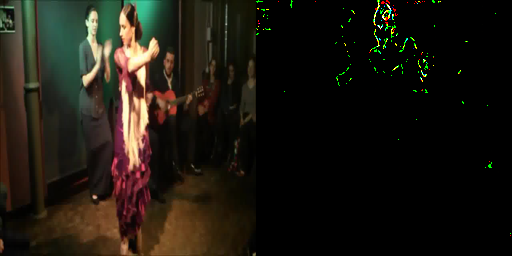

Feature 0


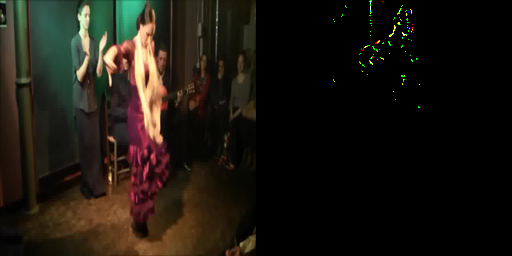

Feature 1


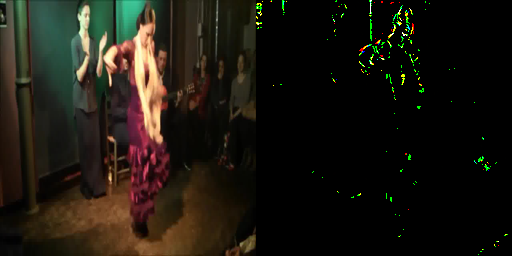

Feature 0


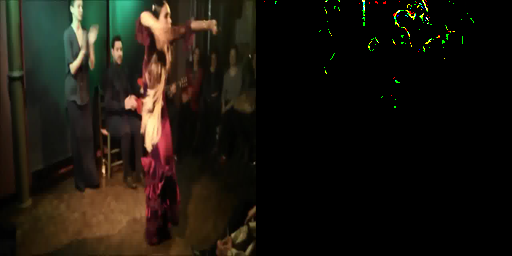

Feature 1


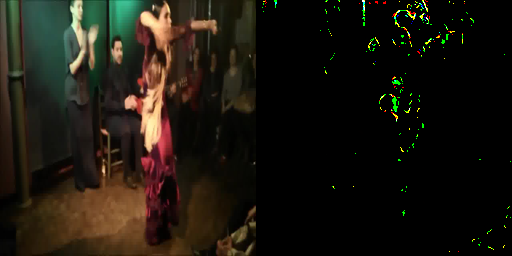

Displaying foxtrot/ezbpkmExW30_035
Feature 0


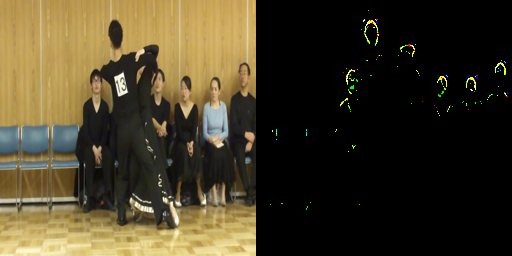

Feature 1


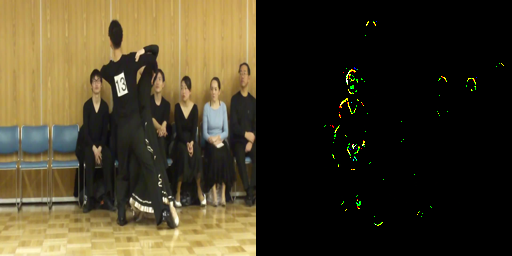

Feature 0


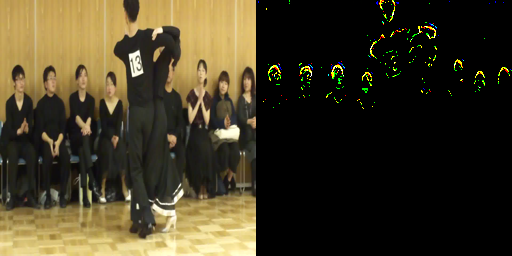

Feature 1


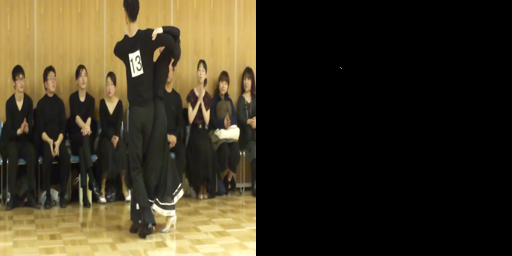

Feature 0


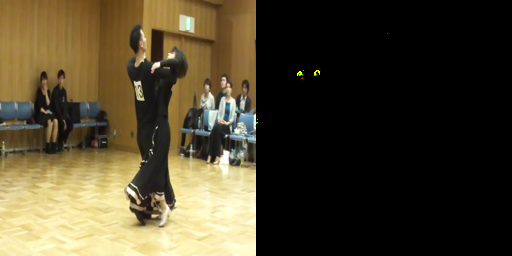

Feature 1


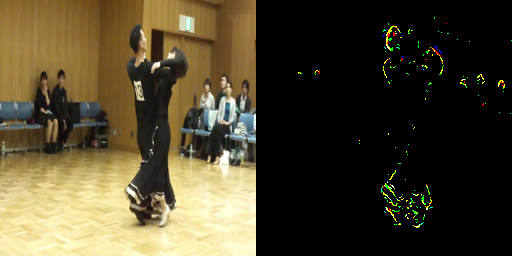

Feature 0


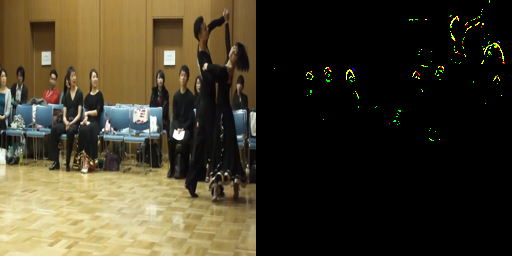

Feature 1


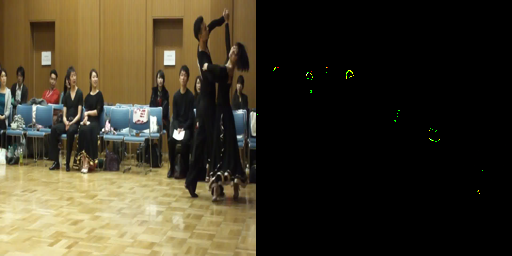

Displaying latin/iRntFnMArIU_206
Feature 0


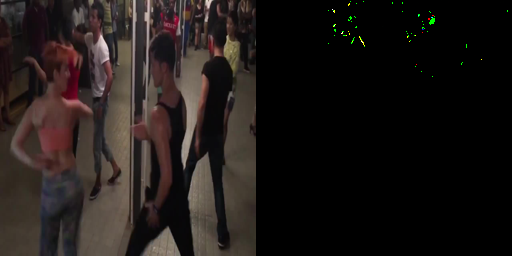

Feature 1


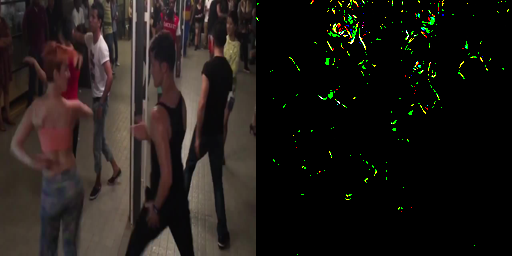

Feature 0


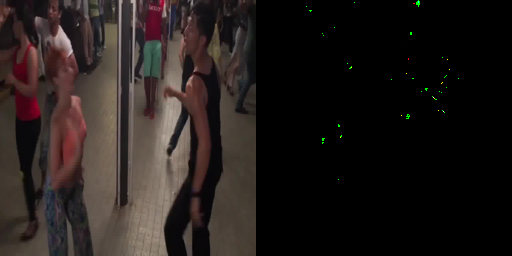

Feature 1


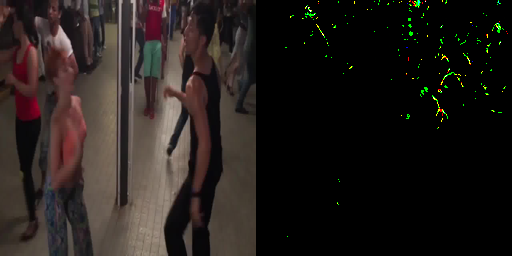

Feature 0


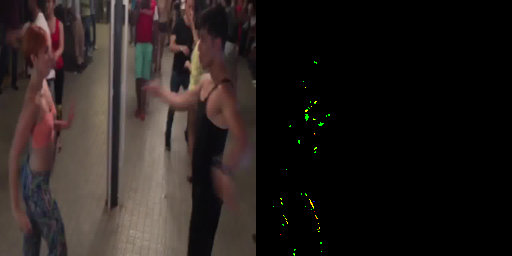

Feature 1


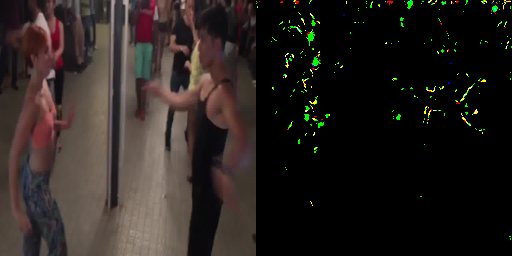

Feature 0


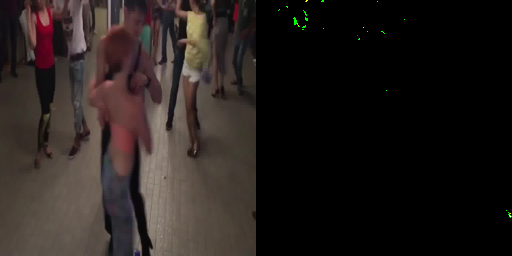

Feature 1


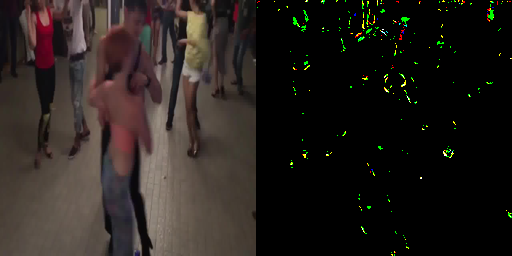

Displaying quickstep/QDiPQ7uBYY4_734
Feature 0


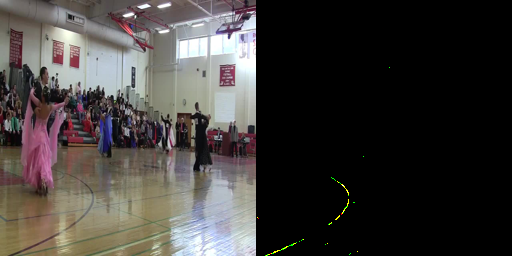

Feature 1


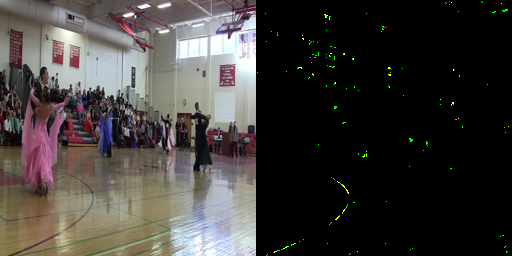

Feature 0


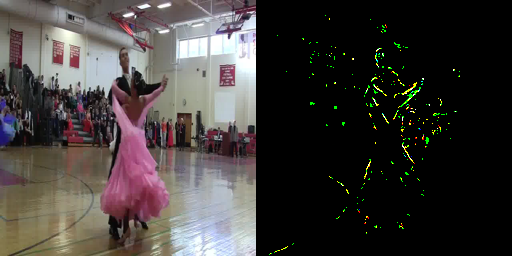

Feature 1


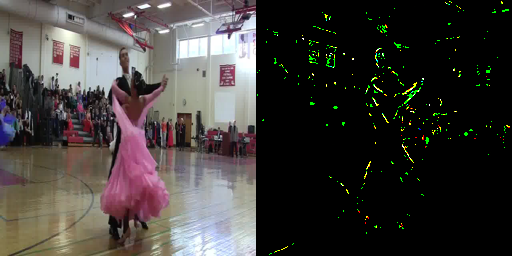

Feature 0


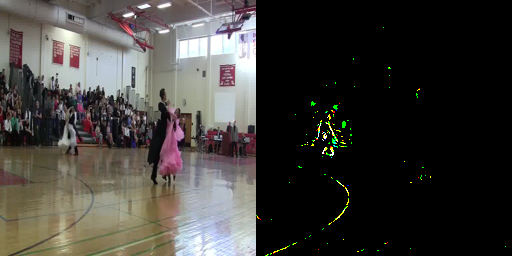

Feature 1


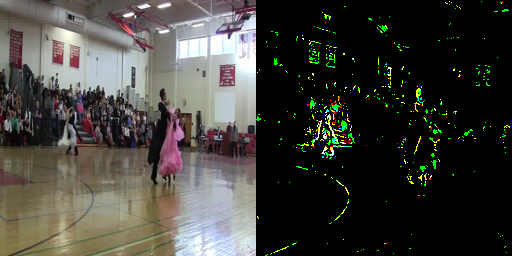

Feature 0


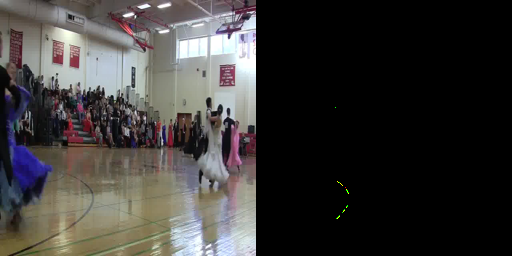

Feature 1


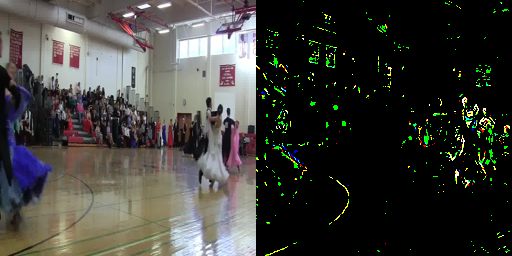

Displaying square/RpbBVHlC8SU_056
Feature 0


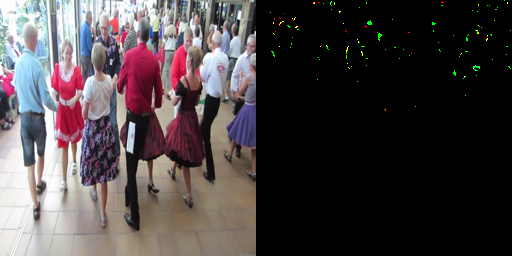

Feature 1


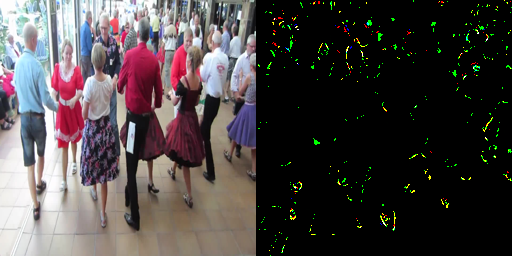

Feature 0


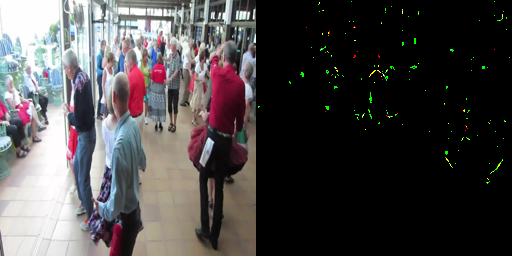

Feature 1


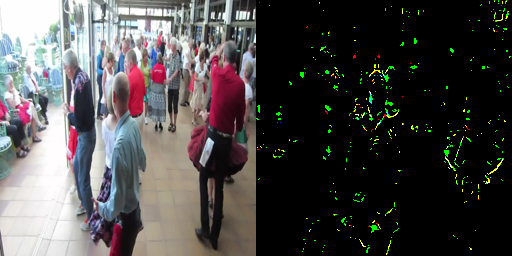

Feature 0


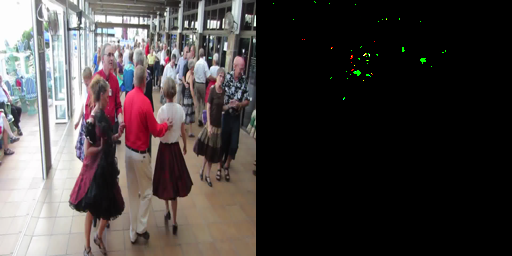

Feature 1


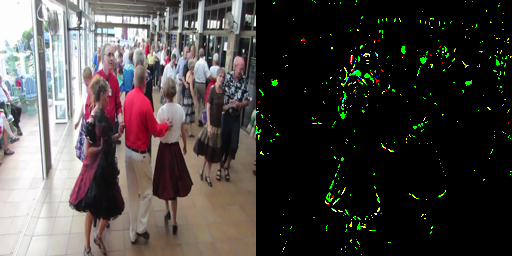

Displaying tango/8LMvAf5ftZ4_008
Feature 0


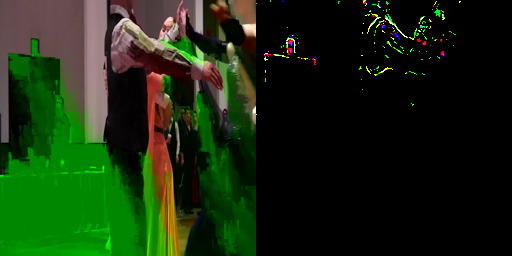

Feature 1


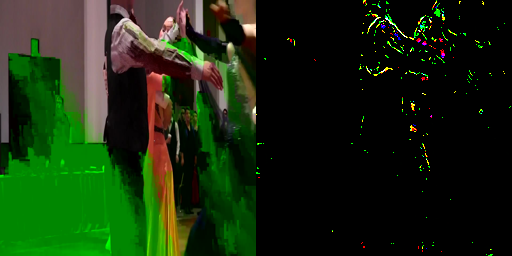

Feature 0


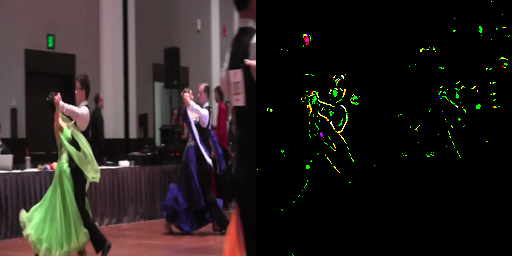

Feature 1


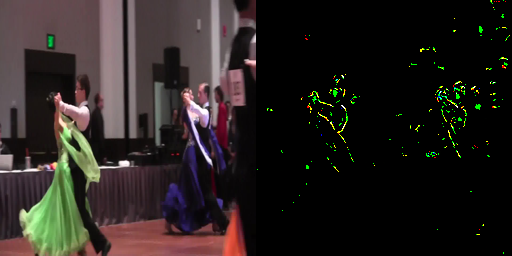

Feature 0


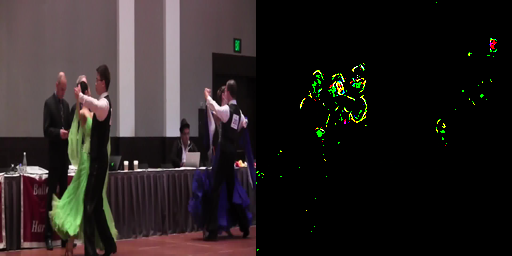

Feature 1


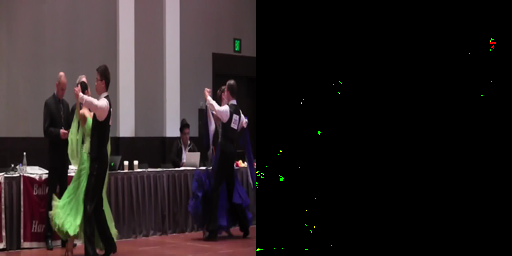

Feature 0


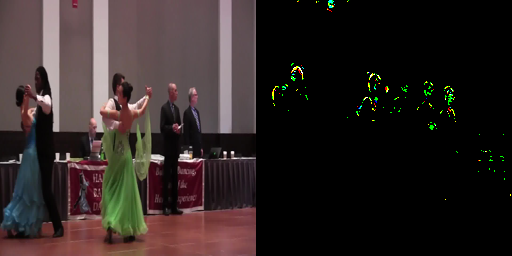

Feature 1


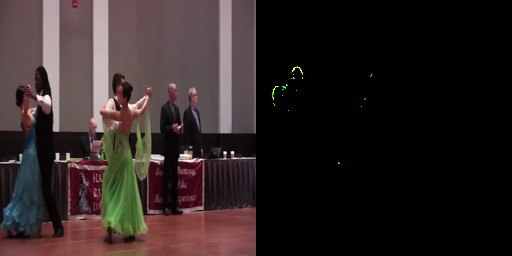

Displaying waltz/AQmHJlhUhes_022
Feature 0


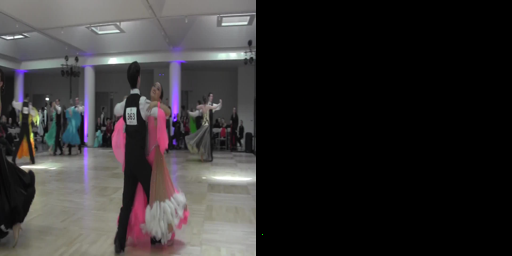

Feature 1


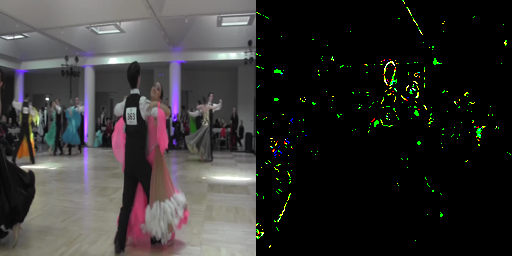

Feature 0


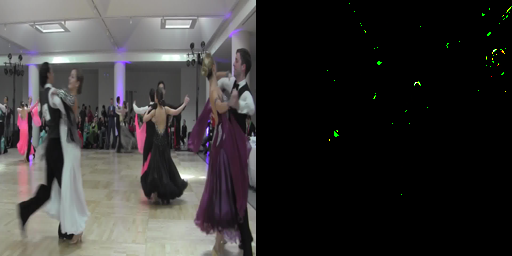

Feature 1


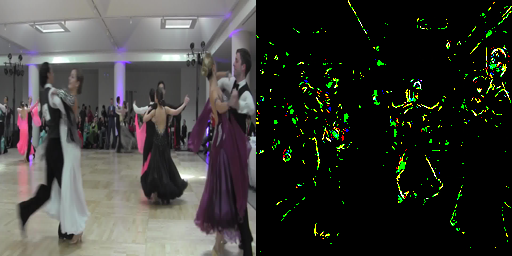

Feature 0


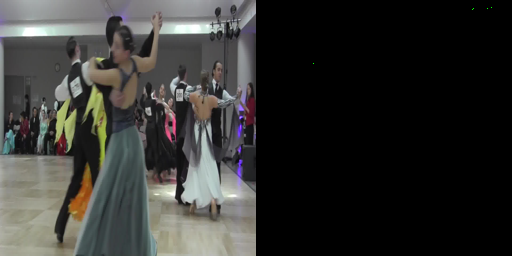

Feature 1


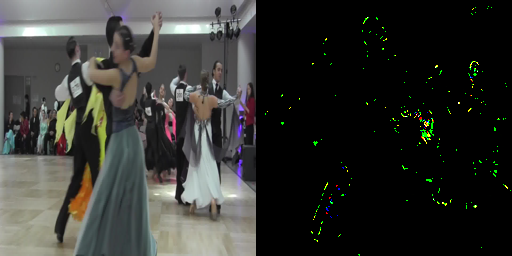

Feature 0


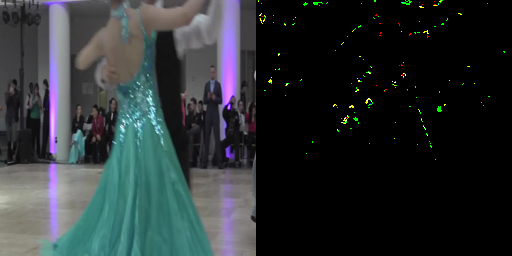

Feature 1


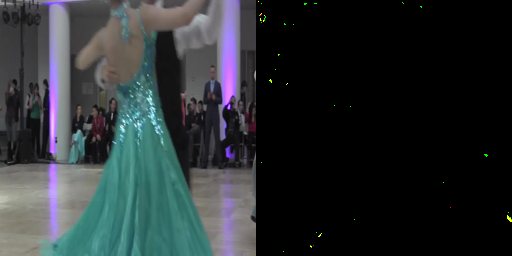

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import json
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
from model import *
from dataset import *
from utils import *
from run import make_paths
from PIL import Image
from visualizations.guided_backprop import *
from visualizations.misc_functions import *

######################################
# Configurable items
######################################
# Key: name, value: # frames
video_examples = { 
    "break/ndUDTMBzJmU_020" : 301,
    "swing/AehnnJzWO80_103" : 251,
    "ballet/mSvNjhEPh7I_050" : 201,
    "flamenco/7L4zXJ1OS6c_456": 301,
    "foxtrot/ezbpkmExW30_035": 301,
    "latin/iRntFnMArIU_206": 301,
    "quickstep/QDiPQ7uBYY4_734": 301,
    "square/RpbBVHlC8SU_056": 241,
    "swing/AehnnJzWO80_103": 251,
    "tango/8LMvAf5ftZ4_008": 301,
    "waltz/AQmHJlhUhes_022": 301, 
}
# How many to skip when iterating through frames of video
skip_size = 100
# Which features to look at
features = [0, 1]


# Load trained models
# some fixed paths
image_dataset = rawImageDataset("/mnt/disks/disk1/processed/test_index.csv")
model = ModelChooser("resnet18_features", 0)
GBP = GuidedBackprop(model)

for video in video_examples:
    print(f"Displaying {video}")
    max = video_examples[video]
    for i in range(1, max+1, skip_size):
        for feature_select in features:
            print(f"Feature {feature_select}")
            img_path = f"/mnt/disks/disk1/raw/rgb/{video}_{i:04d}.jpg"
            orig_img = Image.open(img_path).resize((256, 256))
            # Grab transformed X
            X = image_dataset.get_X(img_path).unsqueeze(0)
            X.requires_grad_()
            # Get gradients
            guided_grads = GBP.generate_gradients(X, feature_select)
            # Save colored gradients
            save_gradient_images(guided_grads, f'img_{i}' + '_Guided_BP_color')
            #Visualize
            guided_grads = format_np_output(guided_grads)
            grad_img = Image.fromarray(guided_grads)
            #Make side by side image
            new_img = Image.new('RGB', (512, 256))
            new_img.paste(orig_img, (0, 0))
            new_img.paste(grad_img, (256, 0))
            display(new_img)
